In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from math import sqrt


df = pd.read_excel ('/content/VI_IDEA.xlsx')
print (df)

           Date  Adj_Close
0    2015-01-01  95.008942
1    2015-01-02  95.336876
2    2015-01-05  91.550819
3    2015-01-06  89.732323
4    2015-01-07  89.285149
...         ...        ...
1223 2019-12-23   6.400000
1224 2019-12-24   6.300000
1225 2019-12-26   6.050000
1226 2019-12-27   5.800000
1227 2019-12-30   6.150000

[1228 rows x 2 columns]


Split Train and Test Dataset

In [80]:
X_train = df[:int(df.shape[0]*0.75)]
X_test = df[int(df.shape[0]*0.75):]

print(X_test)

           Date  Adj_Close
921  2018-09-25  24.420244
922  2018-09-26  24.993065
923  2018-09-27  23.214308
924  2018-09-28  23.244455
925  2018-10-01  23.365049
...         ...        ...
1223 2019-12-23   6.400000
1224 2019-12-24   6.300000
1225 2019-12-26   6.050000
1226 2019-12-27   5.800000
1227 2019-12-30   6.150000

[307 rows x 2 columns]


Simple Moving Average for k=2

In [81]:
for i in range(0,df.shape[0]-1):
    df.loc[df.index[i+1],'SMA_2'] = np.round(((df.iloc[i,1]+ df.iloc[i+1,1]) /2),1)
    
df.head()

,Date,Adj_Close,SMA_2
0,2015-01-01,95.008942,NaN
1,2015-01-02,95.336876,95.2
2,2015-01-05,91.550819,93.4
3,2015-01-06,89.732323,90.6
4,2015-01-07,89.285149,89.5


Root Mean Square Error

In [82]:
df.head()
rms = mean_squared_error(df['Adj_Close'][924:len(df)], df['SMA_2'][924:len(df)])
rms = sqrt(mean_squared_error(df['Adj_Close'][924:len(df)], df['SMA_2'][924:len(df)]))
print("Root Mean Square Error = " ,rms)

Root Mean Square Error =  0.3048990916227719


Plot the Graph

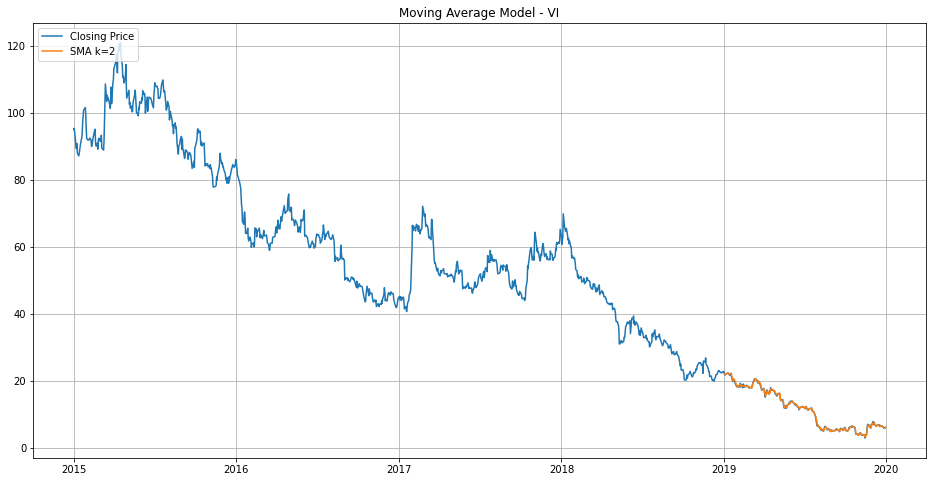

In [83]:
plt.figure(figsize=[16,8])
plt.grid(True)
plt.title('Moving Average Model - VI')
df.set_index('Date',inplace=True)
plt.plot(df['Adj_Close'],label='Closing Price')
plt.plot(df['SMA_2'][988:len(df)],label='SMA k=2')
plt.legend(loc=2)
